# Import data

In [22]:
import os
import pandas as pd
import collections
import seaborn as sns
import re
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [23]:
def importRawData(dir):
    # Import all the data from a directory
    # dir: directory with the data
    # return: a dictionary of dataframes
    dict = {}

    for file in os.listdir(dir):
        if file.endswith('.json'):
            df = pd.read_json(f'{dir}/' + file, lines=True)
            dict[file.removesuffix(".json")] = df

    return dict

raw_data = importRawData('datasets/submissions')

In [24]:
def importPreparedData(path, type="csv"):
    # Import the csv files
    # path: path to the csv files
    # return: dictionary of dataframes for each challenge and each predicate

    allDfs = {} # Dictionary of dataframes for each challenge and each predicate

    # Iterate over the folders
    for folder in os.listdir(path):
        # Iterate over the csv files
        for file in os.listdir(path + folder):
            # Read the file
            if type == "csv":
                df = pd.read_csv(path + folder + "/" + file)
            elif type == "json":
                df = pd.read_json(path + folder + "/" + file, lines=True)
            else:
                print("Error: unknown file type")
                return
            # Add the dataframe to the dictionary
            if folder not in allDfs:
                allDfs[folder] = {}
            cmd = re.sub("\..*", "", file)
            allDfs[folder][cmd] = df
            
        

    return allDfs

# Import the csv files
allDfs = importPreparedData("./all/")
trainDfs = importPreparedData("./train/")
testDfs = importPreparedData("./test/", "json")

# Data analysis

Count number of submissions, correct and incorrect. 

In [25]:
def analyzeRawData(raw_data):
    analysisDf = pd.DataFrame({"Challenge": [], "NumSubmissions": [], "NumCorrect": [], "NumIncorrect": []})
    counter = collections.Counter()

    for challenge, df in raw_data.items():
        count = df["sat"].value_counts().to_dict()
        counter.update(count)
        # Update counter
        analysisDf.loc[len(analysisDf)] = [
            challenge,
            len(df),
            len(df[df["sat"] == 0.0]),
            len(df[df["sat"] == 1.0])
        ]

    print("Total number of submissions: " + str(analysisDf["NumSubmissions"].sum()))
    print("Total number of correct submissions: " + str(analysisDf["NumCorrect"].sum()))
    print("Total number of incorrect submissions: " + str(analysisDf["NumIncorrect"].sum()))

    # Show plot    
    sns.barplot(data=pd.DataFrame.from_dict(counter, orient="index").reset_index(), x="index", y=0, palette=["#0071bc", "#258433", "#a3281d"])
    plt.ylabel("Number of Entries") 
    plt.xlabel("Sat value")

    return analysisDf

def analyzePreparedData(allDfs):
    analysisDf = pd.DataFrame({"Challenge": [], "Predicate": [], "NumSubmissions": [], "NumCorrect": [], "NumIncorrect": [], "NumUniqueASTs": []})
    counter = collections.Counter()

    for challenge, cmdDfs in allDfs.items():
        for cmd, df in cmdDfs.items():
        # Update counter
            count = df["sat"].value_counts().to_dict()
            counter.update(count)
            analysisDf.loc[len(analysisDf)] = [
                challenge,
                cmd,
                len(df),
                len(df[df["sat"] == 0.0]),
                len(df[df["sat"] == 1.0]),
                len(df["ast"].unique())
            ]

    # Sort by number of submissions
    analysisDf = analysisDf.sort_values(by=['NumSubmissions'], ascending=False)

    print("Total number of submissions: " + str(analysisDf["NumSubmissions"].sum()))
    print("Total number of correct submissions: " + str(analysisDf["NumCorrect"].sum()))
    print("Total number of incorrect submissions: " + str(analysisDf["NumIncorrect"].sum()))
    print("Total number of unique ASTs: " + str(analysisDf["NumUniqueASTs"].sum()))

    # Show plot    
    sns.barplot(data=pd.DataFrame.from_dict(counter, orient="index").reset_index(), x="index", y=0, palette=["#258433", "#a3281d"])
    plt.ylabel("Number of Submissions")
    plt.xlabel("Sat value")

    return analysisDf

## Analyze Raw Data

Check data types.

In [26]:
print(raw_data["9jPK8KBWzjFmBx4Hb"].dtypes)

_id              object
time             object
code             object
derivationOf     object
theme            object
original         object
cmd_i           float64
cmd_c           float64
cmd_n            object
sat             float64
msg              object
dtype: object


Analyze number of entries.

Total number of submissions: 35224
Total number of correct submissions: 10537
Total number of incorrect submissions: 14714


,Challenge,NumSubmissions,NumCorrect,NumIncorrect
0,9jPK8KBWzjFmBx4Hb,5279,1440,2912
1,FwCGymHmbqcziisH5,1263,185,796
2,gAeD3MTGCCv8YNTaK,3111,1004,1390
3,JC8Tij8o8GZb99gEJ,1175,151,683
4,jyS8Bmceejj9pLbTW,840,233,344
5,PQAJE67kz8w5NWJuM,4189,1600,1328
6,sDLK7uBCbgZon3znd,3904,1776,790
7,WGdhwKZnCu7aKhXq9,393,64,219
8,YH3ANm7Y5Qe5dSYem,5630,1788,2390
9,zoEADeCW2b2suJB2k,3225,588,1406


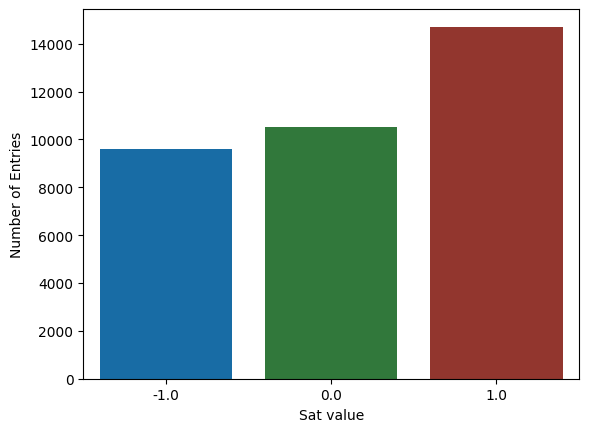

In [27]:
df = analyzeRawData(raw_data)
df

## Analyze All Data

Total number of submissions: 24278
Total number of correct submissions: 10636
Total number of incorrect submissions: 13642
Total number of unique ASTs: 8904


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect,NumUniqueASTs
80,YH3ANm7Y5Qe5dSYem,inv11,598,78,520,273
83,YH3ANm7Y5Qe5dSYem,inv14,544,57,487,302
45,gAeD3MTGCCv8YNTaK,weaklyConnected,531,78,453,248
96,zoEADeCW2b2suJB2k,inv4,529,70,459,293
15,9jPK8KBWzjFmBx4Hb,prop5,424,65,359,180
81,YH3ANm7Y5Qe5dSYem,inv12,420,61,359,194
44,gAeD3MTGCCv8YNTaK,undirected,412,209,203,148
3,9jPK8KBWzjFmBx4Hb,prop12,409,37,372,238
16,9jPK8KBWzjFmBx4Hb,prop6,386,119,267,143
71,sDLK7uBCbgZon3znd,inv7,380,157,223,95


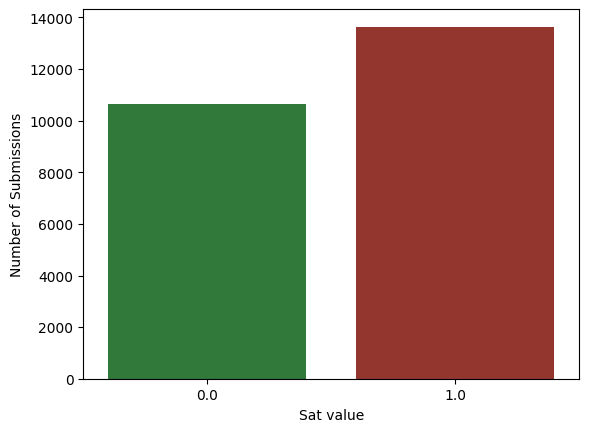

In [28]:
analyzePreparedData(allDfs)

## Analyze train data

Total number of submissions: 21231
Total number of correct submissions: 9321
Total number of incorrect submissions: 11910
Total number of unique ASTs: 7806


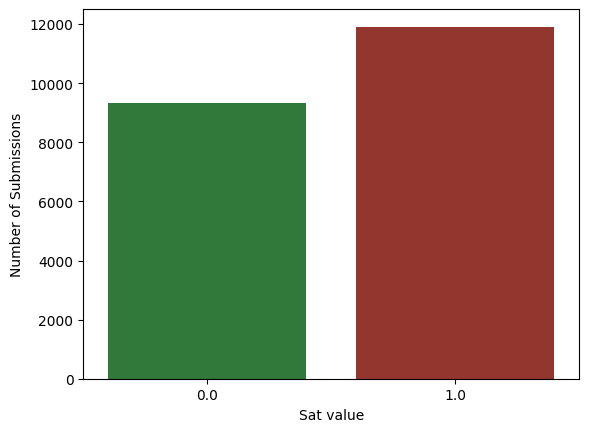

In [29]:
df = analyzePreparedData(trainDfs)

## Analyze test data

Total number of submissions: 1346
Total number of correct submissions: 0
Total number of incorrect submissions: 1346
Total number of unique ASTs: 1140


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect,NumUniqueASTs
56,zoEADeCW2b2suJB2k,inv4,94,0,94,75
44,YH3ANm7Y5Qe5dSYem,inv14,91,0,91,63
66,zRAn69AocpkmxXZnW,inv15,77,0,77,68
28,PQAJE67kz8w5NWJuM,inv7,57,0,57,46
16,JC8Tij8o8GZb99gEJ,Inv4,53,0,53,45
11,gAeD3MTGCCv8YNTaK,undirected,53,0,53,44
45,YH3ANm7Y5Qe5dSYem,inv15,51,0,51,49
12,gAeD3MTGCCv8YNTaK,weaklyConnected,49,0,49,42
41,YH3ANm7Y5Qe5dSYem,inv11,47,0,47,31
27,PQAJE67kz8w5NWJuM,inv6,45,0,45,36


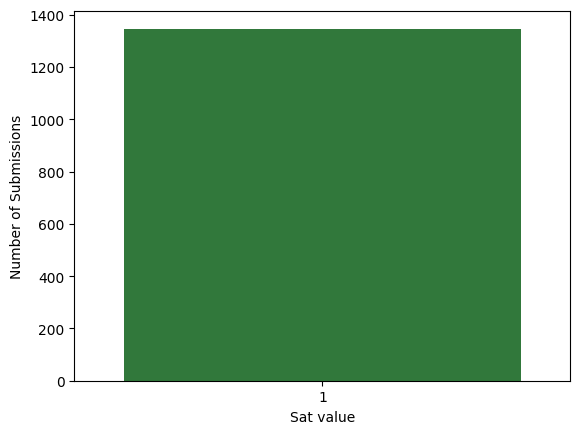

In [30]:
analyzePreparedData(testDfs)

# Graph Analysis

In [31]:
def importGraphAnalytics(path):
    return pd.read_csv(path)

def analyzeGraphAnalytics(df):
    total_submissions = 0
    total_correct = 0
    total_incorrect = 0
    total_edges = 0

    for index, row in df.iterrows():
        total_submissions += row["NumSubmissions"]
        total_correct += row["NumCorrect"]
        total_incorrect += row["NumIncorrect"]
        total_edges += row["NumEdges"]

    print("Total number of submissions: " + str(total_submissions))
    print("Total number of correct submissions: " + str(total_correct))
    print("Total number of incorrect submissions: " + str(total_incorrect))
    print("Total number of edges: " + str(total_edges))

    return [total_submissions, total_correct, total_incorrect, total_edges]

PATH = "./evaluation/graph_stats/"

## All Data

In [32]:
df = importGraphAnalytics(PATH + "all.csv")
analyzeGraphAnalytics(df)

Total number of submissions: 8904
Total number of correct submissions: 1199
Total number of incorrect submissions: 7705
Total number of edges: 13596


[8904, 1199, 7705, 13596]

## Train Data

Total number of submissions: 7806
Total number of correct submissions: 1015
Total number of incorrect submissions: 6791
Total number of edges: 11875


<BarContainer object of 5 artists>

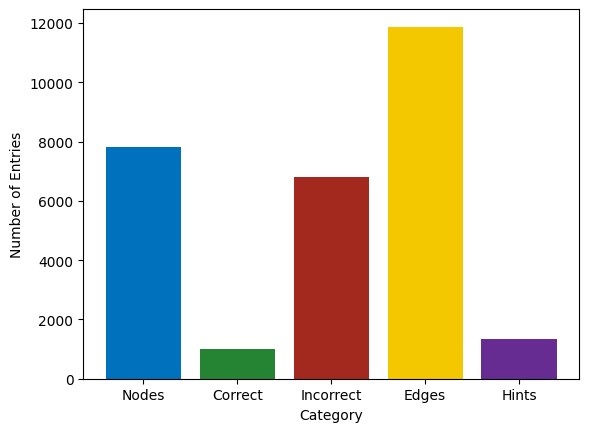

In [33]:
df = importGraphAnalytics(PATH + "train.csv")
data = analyzeGraphAnalytics(df)

data += [1346]
labels = ["Nodes", "Correct", "Incorrect", "Edges", "Hints"]

plt.ylabel("Number of Entries")
plt.xlabel("Category")
plt.bar(labels, data, color=["#0071bc", "#258433", "#a3281d", "#f4c800", "#662c91"])

## Only Sorting Commutative

In [34]:
df = importGraphAnalytics(PATH + "only_sort.csv")
analyzeGraphAnalytics(df)

Total number of submissions: 9513
Total number of correct submissions: 1518
Total number of incorrect submissions: 7995
Total number of edges: 14046


[9513, 1518, 7995, 14046]

## Only Anonymize Vars

In [35]:
df = importGraphAnalytics(PATH + "only_anon.csv")
analyzeGraphAnalytics(df)

Total number of submissions: 9042
Total number of correct submissions: 1254
Total number of incorrect submissions: 7788
Total number of edges: 13729


[9042, 1254, 7788, 13729]

## No Canonicalization

In [36]:
df = importGraphAnalytics(PATH + "no_canon.csv")
analyzeGraphAnalytics(df)

Total number of submissions: 9649
Total number of correct submissions: 1571
Total number of incorrect submissions: 8078
Total number of edges: 14173


[9649, 1571, 8078, 14173]

# Mapping Analysis

Import data and merge dataframes.

In [37]:
# Import
a_file = "./evaluation/edit_scripts_apted.csv"
g_file = "./evaluation/edit_scripts_gumtree.csv"
apted_df = pd.read_csv(a_file, delimiter=";")
gumtree_df = pd.read_csv(g_file, delimiter=";")

# Merge the two dataframes
merge_df = pd.merge(apted_df, gumtree_df, on=["Challenge", "Predicate", "Src", "Target"], suffixes=("_apted", "_gumtree"))

# Add columns counting number of operations
merge_df["nOps_a"] = merge_df["EditScript_apted"].apply(lambda x: len(x[1:-1].split("), (")))
merge_df["nOps_g"] = merge_df["EditScript_gumtree"].apply(lambda x: len(x[1:-1].split("), (")))
merge_df["diff"] = merge_df["nOps_a"] - merge_df["nOps_g"]

# Difference in number of operations
merge_df["diff_mean"] = merge_df["diff"].mean()
merge_df["diff_std"] = merge_df["diff"].std()

Evaluate edit script length

In [38]:
# Count number of hints with lower, higher and equal number of operations
total = len(merge_df)
lower = merge_df[merge_df["nOps_a"] < merge_df["nOps_g"]].copy()
num_lower = len(lower)

higher = merge_df[merge_df["nOps_a"] > merge_df["nOps_g"]].copy()
num_higher = len(higher)

equal = merge_df[merge_df["nOps_a"] == merge_df["nOps_g"]].copy()
num_equal = len(equal)

print("Total number edges: " + str(total))
print("APTED lower number of operations: " + str(num_lower) + " (" + str(round(num_lower / total * 100, 2)) + "%)" + " | Diff Mean: " + str(lower["diff"].mean()) + " | Std: " + str(lower["diff"].std()))
print("GumTree lower number of operations: " + str(num_higher) + " (" + str(round(num_higher / total * 100, 2)) + "%)"+ " | Diff Mean: " + str(higher["diff"].mean()) + " | Std: " + str(higher["diff"].std())) 
print("Equal number of operations: " + str(num_equal) + " (" + str(round(num_equal / total * 100, 2)) + "%)" + " | Diff Mean: " + str(equal["diff"].mean()) + " | Std: " + str(equal["diff"].std()))

print("Mean lower APTED: " + str(lower["nOps_a"].mean()))
print("Mean lower GumTree: " + str(lower["nOps_g"].mean()))
print("Mean higher APTED: " + str(higher["nOps_a"].mean()))
print("Mean higher GumTree: " + str(higher["nOps_g"].mean()))
print("Mean equal APTED: " + str(equal["nOps_a"].mean()))
print("Mean equal GumTree: " + str(equal["nOps_g"].mean()))

Total number edges: 13169
APTED lower number of operations: 2312 (17.56%) | Diff Mean: -3.1262975778546713 | Std: 2.3456341602437667
GumTree lower number of operations: 1302 (9.89%) | Diff Mean: 4.707373271889401 | Std: 6.545971131956454
Equal number of operations: 9555 (72.56%) | Diff Mean: 0.0 | Std: 0.0
Mean lower APTED: 5.794982698961937
Mean lower GumTree: 8.921280276816608
Mean higher APTED: 11.385560675883257
Mean higher GumTree: 6.678187403993856
Mean equal APTED: 2.806384092098378
Mean equal GumTree: 2.806384092098378


Equal length = Equal script?

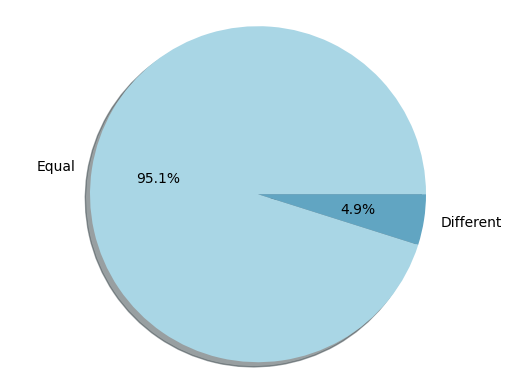

In [39]:
dif_script = equal[equal["EditScript_apted"] != equal["EditScript_gumtree"]]
len_dif_script = len(dif_script)
values = [num_equal-len_dif_script, len_dif_script]
labels = ["Equal", "Different"]

plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, colors=["#a9d6e5", "#61a5c2"])
plt.axis('equal')
plt.show()


# Hint Analysis

Import data.

In [40]:
df = pd.read_json(PATH + "hint_stats.json", lines=True)
df.drop(["mapping", "code"], axis=1, inplace=True)
df.columns

FileNotFoundError: File ./evaluation/graph_stats/hint_stats.json does not exist

Analyze shorter paths.

Total number of hints: 319
Number of hints when shorter path was created: 88 (27.59%)
Number of hints when no path was created: 231 (72.41%)


([<matplotlib.patches.Wedge at 0x253121650c0>,
 [Text(0.7121249159667221, 0.8383782583412986, 'Created path'),
  Text(-0.7121249944613565, -0.8383781916673484, 'Used existing path')],
 [Text(0.38843177234548476, 0.45729723182252646, '27.6%'),
  Text(-0.3884318151607398, -0.45729719545491726, '72.4%')])

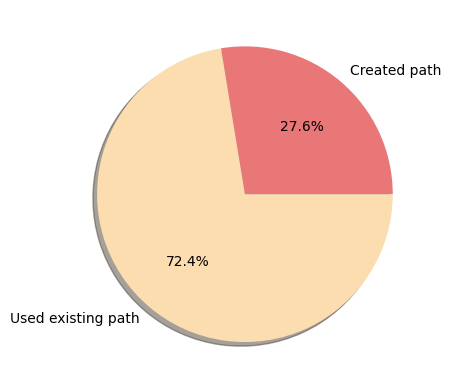

In [ ]:
# Remove cases where created new node
aux = df[df["isNewNode"] == False]
count = aux["createdShorterPath"].value_counts()
total_hints = len(aux)

print("Total number of hints: " + str(len(aux)))
print("Number of hints when shorter path was created: " + str(count[1]) + " (" + str(round(count[1] / total_hints * 100, 2)) + "%)")
print("Number of hints when no path was created: " + str(count[0]) + " (" + str(round(count[0] / total_hints * 100, 2)) + "%)")

data = [count[1], count[0]]
labels = ["Created path", "Used existing path"]

plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, colors=["#E97777", "#FCDDB0"])


Analyze number of new nodes in the graph.

Total number of hints: 1346
Number of old submissions: 319 (23.7%)
Number of new submissions: 1027 (76.3%)


([<matplotlib.patches.Wedge at 0x25312179630>,
 [Text(0.8089301282757169, 0.7454073031355626, 'Existing submissions'),
  Text(-0.8089300933806818, -0.745407341004314, 'New submissions')],
 [Text(0.44123461542311826, 0.40658580171030684, '23.7%'),
  Text(-0.4412345963894627, -0.40658582236598945, '76.3%')])

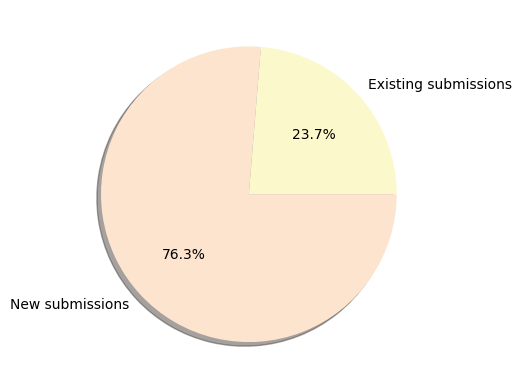

In [ ]:
count = df["isNewNode"].value_counts()
total_hints = len(df)

print("Total number of hints: " + str(total_hints))
print("Number of old submissions: " + str(count[1]) + " (" + str(round(count[1] / total_hints * 100, 2)) + "%)")
print("Number of new submissions: " + str(count[0]) + " (" + str(round(count[0] / total_hints * 100, 2)) + "%)")

data = [count[1], count[0]]
labels = ["Existing submissions", "New submissions"]

plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, colors=["#fbf8cc", "#fde4cf"])


Check time to generate hint.

In [ ]:
avgTime = df["time"].mean()
maxTime = df["time"].max()
minTime = df["time"].min()
print("Average time: " + str(avgTime * 10**(-6)) + " ms")
print("Max time: " + str(maxTime * 10**(-6)) + " ms")
print("Min time: " + str(minTime * 10**(-6)) + " ms")
print("Total time: " + str(df["time"].sum() * 10**(-9)) + " s")
print("Total number of hints: " + str(len(df)))

Average time: 49.135868643387816 ms
Max time: 238.567299 ms
Min time: 25.444 ms
Total time: 66.136879194 s
Total number of hints: 1346


# Teacher study

Get top 20 most popular incorrect submissions.

In [ ]:
# Import data
df = pd.read_csv("./evaluation/teacher_study/popularity_stats.csv", delimiter=";").sort_values("Popularity", ascending=False)
challenges = ["gAeD3MTGCCv8YNTaK" , "zoEADeCW2b2suJB2k"]
df = df[df["Challenge"].isin(challenges)]

# Select challenges graph and lts = student study
df = df[["Challenge", "Predicate", "Expr"]]
df = df.head(10).sort_values("Predicate", ascending=False)

# Export
df.to_csv("./evaluation/teacher_study/most_popular.csv", sep=";", index=False)
df

,Challenge,Predicate,Expr
5515,gAeD3MTGCCv8YNTaK,weaklyConnected,all n: Node | Node in n.^adj
5513,gAeD3MTGCCv8YNTaK,weaklyConnected,all n: Node | Node in n.^(adj + ~adj)
5205,gAeD3MTGCCv8YNTaK,undirected,all n : Node | n in n.adj.~adj
5210,gAeD3MTGCCv8YNTaK,undirected,adj.~adj in iden
5711,gAeD3MTGCCv8YNTaK,stonglyConnected,all n : Node | Node in n.^adj
5706,gAeD3MTGCCv8YNTaK,stonglyConnected,Node in Node.^adj
5466,gAeD3MTGCCv8YNTaK,noLoops,all n : Node | n not in n.^adj
6183,zoEADeCW2b2suJB2k,inv3,all y : State | lone y.trans
6185,zoEADeCW2b2suJB2k,inv3,"all x : State, y : Event | lone x.trans.y"
6125,zoEADeCW2b2suJB2k,inv1,some State.trans


Import with hints.

In [ ]:
df = pd.read_csv("./evaluation/teacher_study/teacher_study.csv", delimiter=";")
df.sort_values(["Challenge", "Predicate"], ascending=False, inplace=True)
df

,Challenge,Predicate,Expression,Solution,Hint
7,zoEADeCW2b2suJB2k,inv3,all y : State | lone y.trans,"all s : State, e : Event | lone e.(s.trans)","Keep going! You can use variables to help specify the condition. Consider introducing a new variable ""Event"" to your expression using the universal quantifier ('all')."
8,zoEADeCW2b2suJB2k,inv3,"all x : State, y : Event | lone x.trans.y","all s: State, e: Event | lone ~(s.trans).e",One step away from the solution! Consider adding a transpose operator ('~') to transpose a relation. Think about how you can incorporate this within the dot join operator ('.') expression.
9,zoEADeCW2b2suJB2k,inv1,some State.trans,all s : State | some s.trans,"Keep going! You can use variables to help specify the condition. Consider introducing a new variable ""State"" to your expression using the universal quantifier ('all')."
0,gAeD3MTGCCv8YNTaK,weaklyConnected,all n: Node | Node in n.^adj,all v : Node | Node in v.*(adj + ~adj),Keep going! Consider adding a reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation. Think about how you can incorporate this within the dot join operator ('.') expression.
1,gAeD3MTGCCv8YNTaK,weaklyConnected,all n: Node | Node in n.^(adj + ~adj),all v : Node | Node in v.*(adj + ~adj),"One step away from the solution! Instead of using transitive closure operator ('^') to get the transitive closure of a relation, try using reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation."
2,gAeD3MTGCCv8YNTaK,undirected,all n : Node | n in n.adj.~adj,adj = ~adj,"Keep going! Instead of using dot join operator ('.') to perform a relational join between sets or relations, try using equal operator ('=') to specify that the left side is equal to the right side."
3,gAeD3MTGCCv8YNTaK,undirected,adj.~adj in iden,adj = ~adj,"Near a solution! Instead of using dot join operator ('.') to perform a relational join between sets or relations, try using equal operator ('=') to specify that the left side is equal to the right side."
4,gAeD3MTGCCv8YNTaK,stonglyConnected,all n : Node | Node in n.^adj,all n:Node | Node in n.*adj,"One step away from the solution! Instead of using transitive closure operator ('^') to get the transitive closure of a relation, try using reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation."
5,gAeD3MTGCCv8YNTaK,stonglyConnected,Node in Node.^adj,all n:Node | Node in n.*adj,"Keep going! Instead of using transitive closure operator ('^') to get the transitive closure of a relation, try using reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation."
6,gAeD3MTGCCv8YNTaK,noLoops,all n : Node | n not in n.^adj,all n : Node | n not in n.adj,One step away from the solution! It seems like the field/adj is not in the right place. Try moving it to the inside of the dot join operator ('.')expression. Try moving it so that you correctly ensure the required property.


# Study Analysis

Stats of the graphs.

In [ ]:
df = pd.read_csv("./evaluation/student_study/graph_statistics.csv")
df

,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect,NumEdges
0,gAeD3MTGCCv8YNTaK,undirected,148,28,120,238
1,gAeD3MTGCCv8YNTaK,oriented,90,24,66,142
2,gAeD3MTGCCv8YNTaK,acyclic,77,14,63,123
3,gAeD3MTGCCv8YNTaK,complete,102,18,84,186
4,gAeD3MTGCCv8YNTaK,noLoops,56,14,42,100
5,gAeD3MTGCCv8YNTaK,weaklyConnected,248,15,233,407
6,gAeD3MTGCCv8YNTaK,stonglyConnected,68,15,53,116
7,gAeD3MTGCCv8YNTaK,transitive,58,16,42,82
8,zoEADeCW2b2suJB2k,inv1,48,11,37,85
9,zoEADeCW2b2suJB2k,inv2,35,7,28,51


## First

Import data.

In [ ]:
hdf = pd.read_json("./evaluation/student_study/first/HigenaHint.json")
mdf = pd.read_json("./evaluation/student_study/first/Model.json")

print("Number of hints: " + str(len(hdf)))
hdf.drop_duplicates(subset=["hint"], inplace=True)
print("Number of unique hints: " + str(len(hdf)))
hdf[["sourceExpr", "hint", "expression"]]

Number of hints: 13
Number of unique hints: 9


,sourceExpr,hint,expression
0,all n : Node | n in n.adj.adj,"Keep going! You can use variables to help specify the condition. Consider introducing a new variable ""disj"" to your expression using the universal quantifier ('all').",undirected
1,"all x, y: Node | x in y.(^adj)","Keep going! You can use variables to help specify the condition. Consider introducing a new variable ""=>"" to your expression using the universal quantifier ('all').",noLoops
2,"all x, y: Node | x not in y.(^adj)","Keep going! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the transitive closure operator ('^'). If you want to keep it, try to fix your expression another way and reach a different solution!",noLoops
3,"all x, y: Node | x not in y.(adj)","Keep going! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the one of. If you want to keep it, try to fix your expression another way and reach a different solution!",noLoops
4,all n:Node | n not in n.^adj,"One step away from the solution! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the transitive closure operator ('^'). If you want to keep it, try to fix your expression another way and reach a different solution!",noLoops
5,all n:Node | n in n.^adj,Keep going! Consider adding a reflexive-transitive closure operator ('*') to get the reflexive-transitive closure of a relation. Think about how you can incorporate this within the dot join operator ('.') expression.,weaklyConnected
6,all n : Node | n in n.*adj,Keep going! Consider adding a union operator ('+') to combine two sets. Think about how you can incorporate this within the reflexive-transitive closure operator ('*') expression.,weaklyConnected
8,all x: Node | x in x.(^adj) || (no x.adj),Keep going! Consider adding a dot join operator ('.') to perform a relational join between sets or relations. Think about how you can incorporate this within the disjunction operator ('or') expression.,weaklyConnected
12,"all x, y: Node | (y in x.(*(adj + adj')))",Near a solution! Consider adding a transpose operator ('~') to transpose a relation. Think about how you can incorporate this within the union operator ('+') expression.,weaklyConnected


## Second

In [ ]:
hdf = pd.read_json("./evaluation/student_study/second/HigenaHint.json")
mdf = pd.read_json("./evaluation/student_study/second/Model.json")

print("Number of hints: " + str(len(hdf)))
hdf.drop_duplicates(subset=["hint"], inplace=True)
print("Number of hints: " + str(len(hdf)))
hdf[["sourceExpr", "hint", "expression"]]

Number of hints: 12
Number of hints: 6


,sourceExpr,hint,expression
0,"all s1:State, s2:State | some e:Event, s3:State | s1->e->s3 in trans and s2->e->s3 in trans implies s1=s2",Keep going! Consider adding a variable of type State to help satisfy the required property. Think about how you can incorporate this within the = expression.,inv3
3,"all s:State, e:Event, s1:State, s2:State | s->e->s1 in trans and s->e->s2 in trans implies s1=s2","Keep going! You can use variables to help specify the condition. Consider introducing a new variable ""."" to your expression using the existential quantifier ('some').",inv5
4,"all e:Event, s1:State, s2:State | trans.s1 = trans.s2",Keep going! Consider adding a dot join operator ('.') to perform a relational join between sets or relations. Think about how you can incorporate this within the dot join operator ('.') expression.,inv5
5,"all s1:State, s2:State, e:Event, s3:State, s4:State | s1->e->s3 in trans and s2->e->s4 in trans implies s1=s2","Keep going! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the inclusion operator ('in'). If you want to keep it, try to fix your expression another way and reach a different solution!",inv6
9,"all e:Event, s1:State, s2:State | some s3:State, s4:State | s1->e->s2 in trans and s3->e->s4 in trans implies s1=s3 and s2=s4","Keep going! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the =. If you want to keep it, try to fix your expression another way and reach a different solution!",inv3
10,"all e:Event, s1:State, s2:State | some s3:State, s4:State | s1->e->s2 in trans and s3->e->s4 in trans implies s1=s3","Keep going! It seems like you have unnecessary elements in your expression. You can try simplifying your expression by deleting the one of. If you want to keep it, try to fix your expression another way and reach a different solution!",inv3
